<a href="https://colab.research.google.com/github/shahista037/RD-INFRO-TECHNOLOGY/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-22fa5db95205>:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("card_transdata.csv", header=None, names=column_names)


   distance_from_home  distance_from_last_transaction  \
0  distance_from_home  distance_from_last_transaction   
1   57.87785658389723              0.3111400080477545   
2  10.829942699255545             0.17559150228166587   
3   5.091079490616996              0.8051525945853258   
4  2.2475643282963613                5.60004354707232   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0  ratio_to_median_purchase_price  repeat_retailer  used_chip   
1              1.9459399775518593              1.0        1.0   
2              1.2942188106198573              1.0        0.0   
3             0.42771456119427587              1.0        0.0   
4             0.36266257805709584              1.0        1.0   

   used_pin_number  online_order  fraud  
0  used_pin_number  online_order  fraud  
1              0.0           0.0    0.0  
2              0.0           0.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  
<class 'pandas

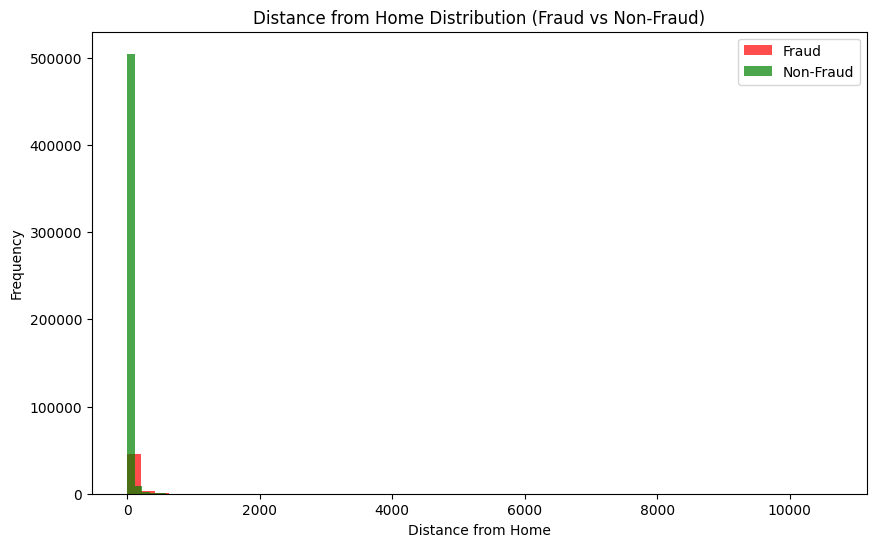

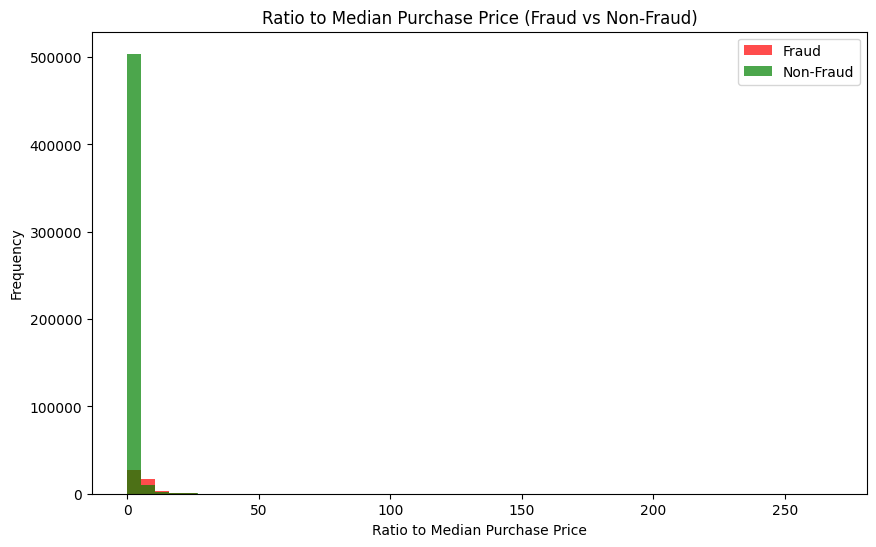

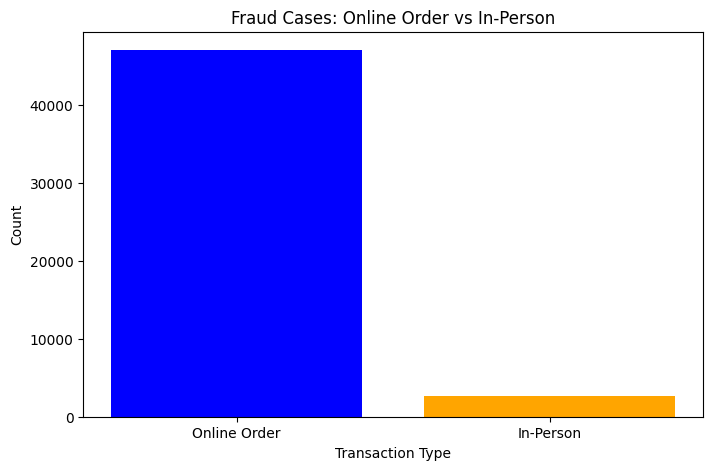

Sample Fraud Transactions:
      distance_from_home ratio_to_median_purchase_price online_order fraud
65566           1.442613                      31.015901          1.0   1.0
65568           0.200571                       8.567437          1.0   1.0
65571         117.917126                       0.286869          1.0   1.0
65583           1.367271                       4.499008          1.0   1.0
65585          87.891065                       4.433359          1.0   1.0
65603           110.8941                       0.633959          1.0   1.0
65611            3.06811                       6.190636          1.0   1.0
65612           5.184292                       4.820208          1.0   1.0
65625            0.90296                       4.339175          1.0   1.0
65626           7.448253                       5.134709          1.0   1.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with no header and assign column names manually
column_names = [
    'distance_from_home', 'distance_from_last_transaction',
    'ratio_to_median_purchase_price', 'repeat_retailer',
    'used_chip', 'used_pin_number', 'online_order', 'fraud'
]

df = pd.read_csv("card_transdata.csv", header=None, names=column_names)

# Check the first few rows to verify the correct column names
print(df.head())
print(df.info())
# Display first few rows of the dataset to understand its structure
print(df.head())

# Check dataset information (column names, missing values, data types)
print(df.info())

# Summary statistics of numeric columns
print(df.describe())

# Identify fraud cases (1 for fraud, 0 for non-fraud)
fraud_df = df[df['fraud'] == 1]
non_fraud_df = df[df['fraud'] == 0]

# Count of fraud vs non-fraud transactions
fraud_count = fraud_df.shape[0]
non_fraud_count = non_fraud_df.shape[0]

print(f"Number of fraud cases: {fraud_count}")
print(f"Number of non-fraud cases: {non_fraud_count}")

# Analyzing the distribution of distance from home for fraud vs non-fraud cases
plt.figure(figsize=(10, 6))
plt.hist(fraud_df['distance_from_home'], bins=50, alpha=0.7, label='Fraud', color='r')
plt.hist(non_fraud_df['distance_from_home'], bins=50, alpha=0.7, label='Non-Fraud', color='g')
plt.legend()
plt.title('Distance from Home Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.show()

# Analyzing the distribution of ratio to median purchase price for fraud vs non-fraud cases
plt.figure(figsize=(10, 6))
plt.hist(fraud_df['ratio_to_median_purchase_price'], bins=50, alpha=0.7, label='Fraud', color='r')
plt.hist(non_fraud_df['ratio_to_median_purchase_price'], bins=50, alpha=0.7, label='Non-Fraud', color='g')
plt.legend()
plt.title('Ratio to Median Purchase Price (Fraud vs Non-Fraud)')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Frequency')
plt.show()

# Analyzing online order vs in-person transactions for fraud cases
plt.figure(figsize=(8, 5))
plt.bar(['Online Order', 'In-Person'], [fraud_df['online_order'].sum(), len(fraud_df) - fraud_df['online_order'].sum()], color=['blue', 'orange'])
plt.title('Fraud Cases: Online Order vs In-Person')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Sample fraud transaction details (distance from home, ratio to median purchase price, and online order)
fraud_sample = fraud_df[['distance_from_home', 'ratio_to_median_purchase_price', 'online_order', 'fraud']].head(10)
print("Sample Fraud Transactions:")
print(fraud_sample)